Random Forest Accuracy: 0.99
KNN Accuracy: 0.96
Naive Bayes Accuracy: 1.00

Final Model Performance (Random Forest):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon      

C:\Users\Harshith K S\AppData\Local\Temp\ipykernel_18592\3728462367.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


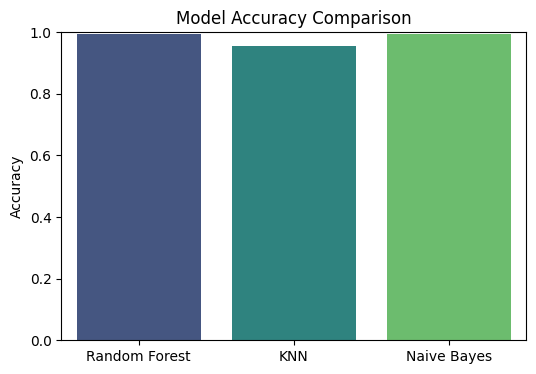

C:\Users\Harshith K S\AppData\Local\Temp\ipykernel_18592\3728462367.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="mako")


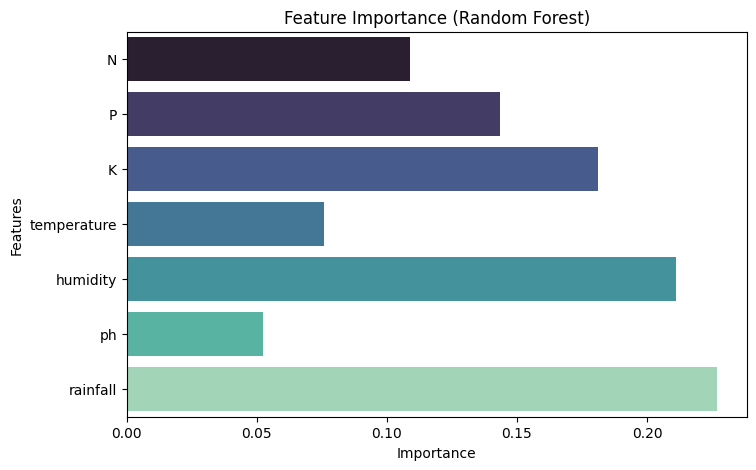

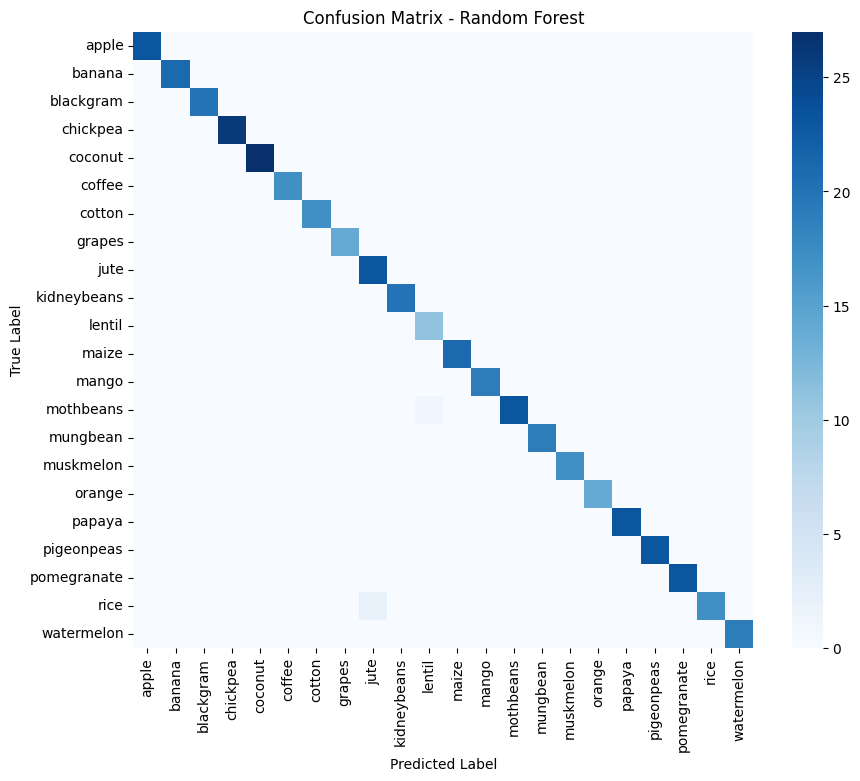


Recommended Crop: rice


C:\Users\Harshith K S\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Crop Recommendation System with Graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# 1. Load Dataset
# --------------------------
df = pd.read_csv("Crop_recommendation.csv")

X = df.drop("label", axis=1)
y = df["label"]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# --------------------------
# 2. Train-Test Split & Scaling
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------
# 3. Train Multiple Models
# --------------------------
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

model_names = []
accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)
    print(f"{name} Accuracy: {acc:.2f}")

# --------------------------
# 4. Select Final Model (Random Forest)
# --------------------------
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nFinal Model Performance (Random Forest):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --------------------------
# 5. Plot Model Accuracy Comparison
# --------------------------
plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# --------------------------
# 6. Feature Importance (Random Forest)
# --------------------------
importances = final_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette="mako")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# --------------------------
# 7. Confusion Matrix Heatmap
# --------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --------------------------
# 8. Crop Recommendation Function
# --------------------------
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    features = scaler.transform(features)
    prediction = final_model.predict(features)
    crop = le.inverse_transform(prediction)[0] 
    return crop

# Example usage
print("\nRecommended Crop:", recommend_crop(90, 42, 43, 20.8, 82, 6.5, 200))